In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_parquet_path = "RefinedData/BeerAdvocate/users7.parquet"
users_ddf = pd.read_parquet(users_parquet_path)

In [3]:
users_ddf.describe()

,n_ratings,n_reviews,cfm_score,exp_score,xpl_score,adv_score,is_cfm,is_exp,is_xpl,is_adv
count,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000
mean,132.140068,41.577222,-1.521565,-0.455170,0.087978,0.072911,0.100004,0.029593,0.136058,0.100004
std,387.875528,221.338522,1.863792,0.210935,0.130990,0.125241,0.300007,0.169463,0.342853,0.300007
min,5.000000,0.000000,-63.747995,-3.542857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,-1.774929,-0.525845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,1.000000,-1.085113,-0.413928,0.043478,0.017544,0.000000,0.000000,0.000000,0.000000
75%,88.000000,10.000000,-0.680349,-0.331429,0.125000,0.095238,0.000000,0.000000,0.000000,0.000000
max,12046.000000,8970.000000,-0.003932,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


With the description of users_ddf wecan see that mean(is_exp)=0.1 so 10% of the users are conformist. Using the same reasoning we get that 3%,14%,10% of the users are expert_like, explorer and adventurer. Also the selected users have 132 ratings in average and the median is 23.

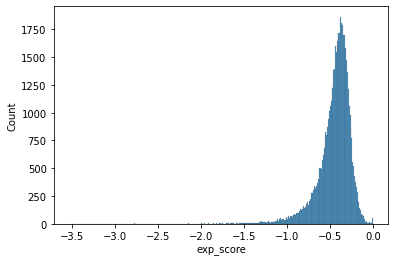

In [4]:
ax2=sns.histplot(data=users_ddf, x="exp_score")


The expert score is gaussian as expected because most users follow the behavior of the expert by chance and a little part of users have the opposite/same behavior than the expert. 

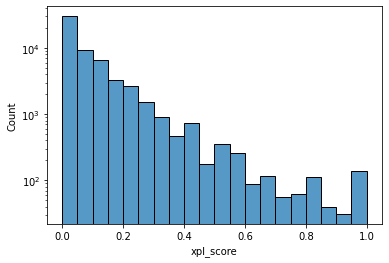

In [5]:
ax3=sns.histplot(data=users_ddf, x="xpl_score",log_scale=(False,True),bins=20)


Using log scale we can see that the xpl_score follow a negative power law meaning most users rarely rate beers that have less than 10 ratings and the users that usually rate these are rare.

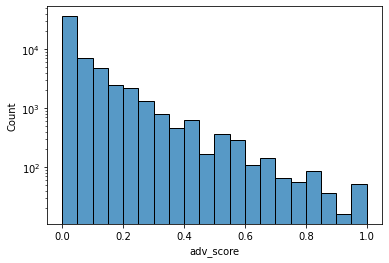

In [6]:
ax4=sns.histplot(data=users_ddf, x="adv_score",log_scale=(False,True),bins=20)

Using logscale once again we can see that the adv_score follow a negative power law meaning most users rate beers that are above 3.25 and users that usually rate beers with less than 3.25 ratings are rare.

quantiles=np.linspace(0, len(users_ddf.n_ratings), num=21).astype('int')


n_ratings_intervals = np.linspace(0, users_df.n_ratings.max(), num=24).astype('int') # every 500 ratings

In [7]:
# create n quantile of the diffrent users 
NUMBER_OF_QUANTILE=10 
quantiles=np.linspace(0, len(users_ddf.n_ratings), num=NUMBER_OF_QUANTILE+1).astype('int')

In [8]:
users_ddf=users_ddf.sort_values(['n_ratings'])

Here each quantile represent 100/NUMBER_OF_QUANTILE=10% of the users.\
I've choose to use quantile to represent the variation of the percentage per users classification instead of fixed interval because it allowed use to have 10% of the users per point this give us confidence in the results because 5710 users have been tested per quantile.\
However one drawback with this approach is that for higher quantiles there is a high diffrence of vote between the first user and the last user of the quantile as illustrated there. This mean that the last quantiles are inhomogeneous but still represent the users with the most number of ratings.

In [9]:

print('number of rating for the first user of the last quantile : '+str(users_ddf.iloc[quantiles[-2]].n_ratings))
print('number of rating for the last user of the last quantile : '+str(users_ddf.iloc[quantiles[-1]-1].n_ratings))


number of rating for the first user of the last quantile : 308
number of rating for the last user of the last quantile : 12046


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Percentage of chance to be Adventurer')

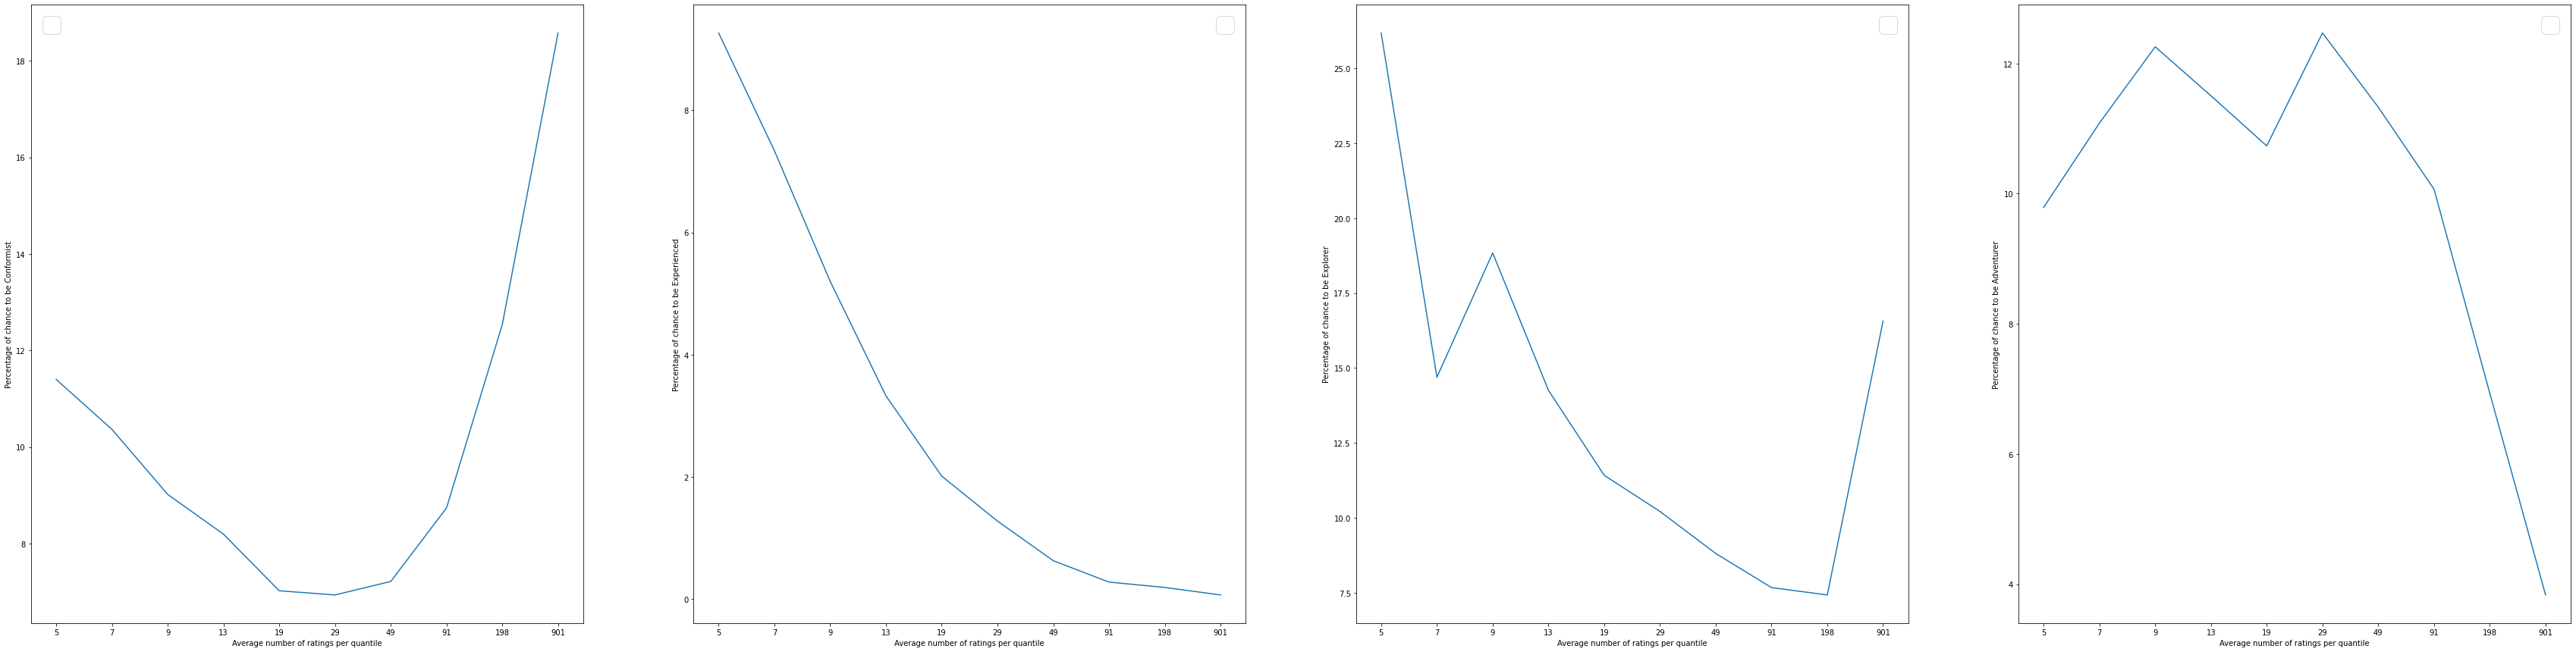

In [10]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figwidth(60)
fig.set_figheight(15)
percentages=[]
plt.rcParams.update({'font.size': 30})
for i in range(len(quantiles)-1):
    quantile=users_ddf.iloc[quantiles[i]:quantiles[i+1]]
    percentages.append(quantile['is_cfm'].mean()*100)
    percentages.append(quantile['is_exp'].mean()*100)
    percentages.append(quantile['is_xpl'].mean()*100)
    percentages.append(quantile['is_adv'].mean()*100)
    percentages.append(str(round(quantile['n_ratings'].mean())))

ax1.plot(percentages[4::5],percentages[0::5])

ax1.legend()
ax1.set_xlabel('Average number of ratings per quantile')
ax1.set_ylabel('Percentage of chance to be Conformist')

ax2.plot(percentages[4::5],percentages[1::5])
ax2.legend()
ax2.set_xlabel('Average number of ratings per quantile')
ax2.set_ylabel('Percentage of chance to be Experienced')

ax3.plot(percentages[4::5],percentages[2::5])
ax3.legend()
ax3.set_xlabel('Average number of ratings per quantile')
ax3.set_ylabel('Percentage of chance to be Explorer')

ax4.plot(percentages[4::5],percentages[3::5])
ax4.legend()
ax4.set_xlabel('Average number of ratings per quantile')
ax4.set_ylabel('Percentage of chance to be Adventurer')

In [11]:
# create a column with a string of the location and the number of users associated with this location
users_ddf=pd.merge(users_ddf.groupby('location').count()[['n_ratings']].reset_index().rename(columns={'n_ratings':'user_per_location'}),users_ddf,left_on='location',right_on='location')
users_ddf['location_users']=users_ddf.apply(lambda x: x['location'] + ' '+str(x['user_per_location']),axis=1)

Text(0, 0.5, 'Location and number of users in this location')

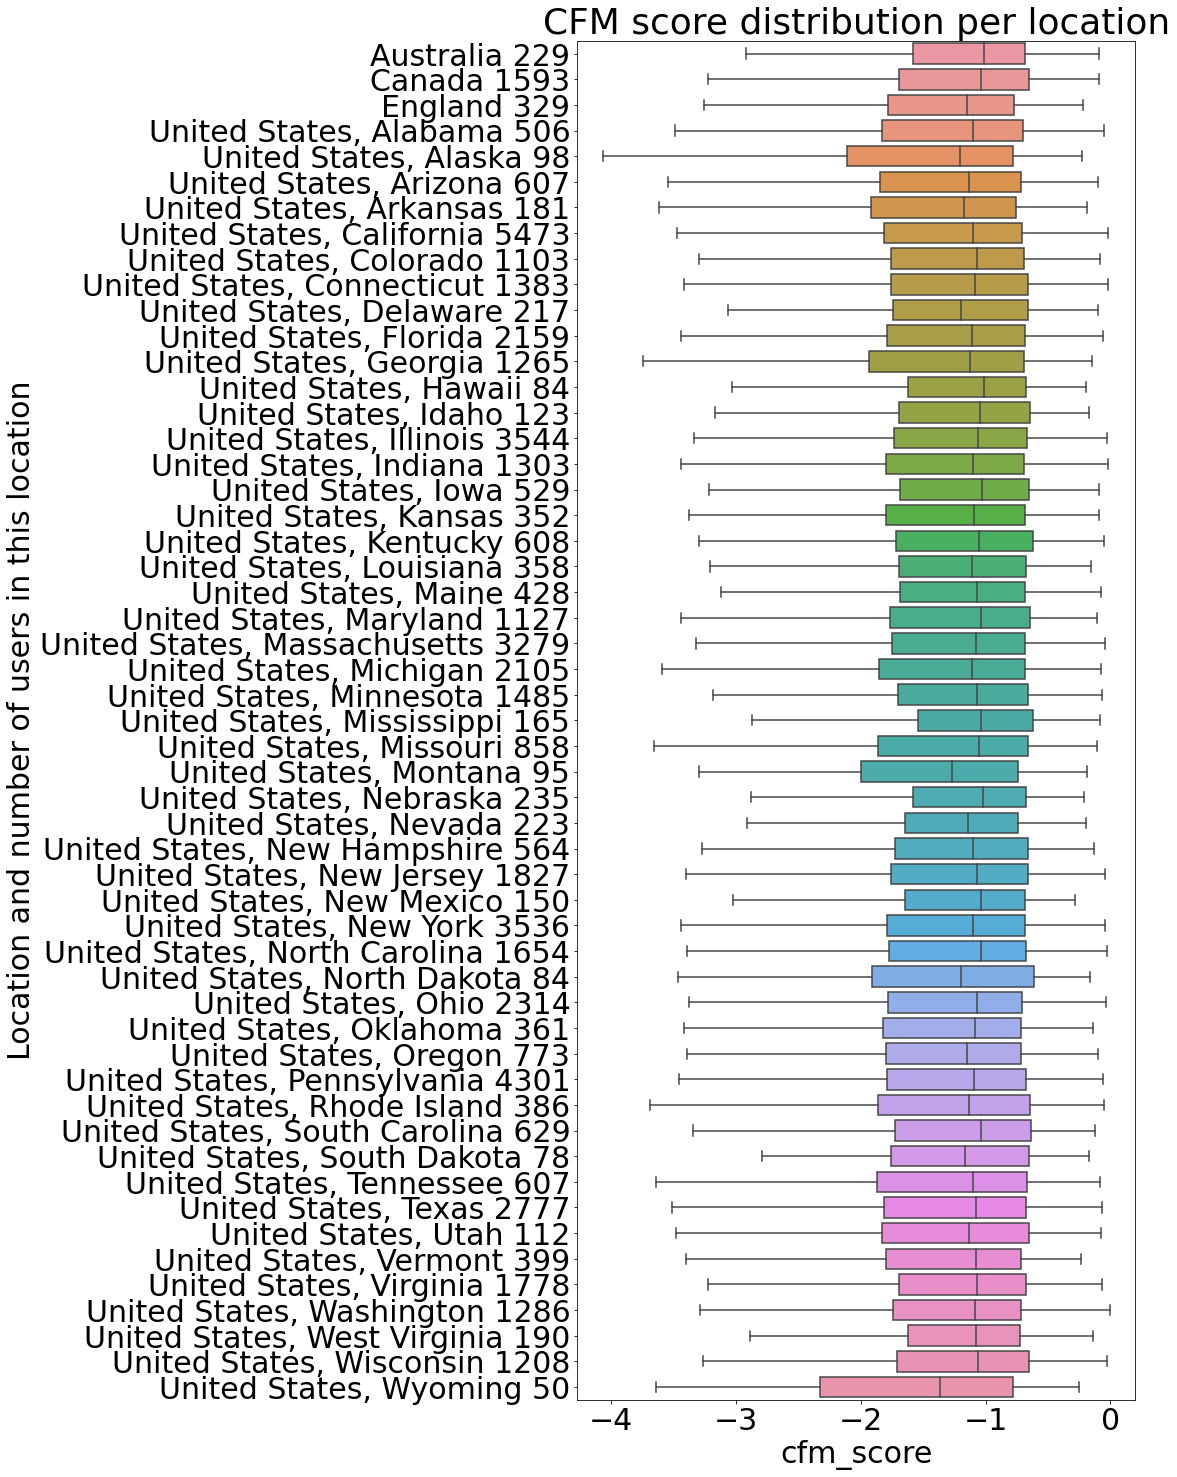

In [12]:
plt.figure(figsize=(10,25))
ax=sns.boxplot(data=users_ddf, x="cfm_score", y="location_users",showfliers = False)
ax.set_title('CFM score distribution per location')
ax.set_ylabel('Location and number of users in this location')

Text(0.5, 0, 'Percentage of chance to be CFM')

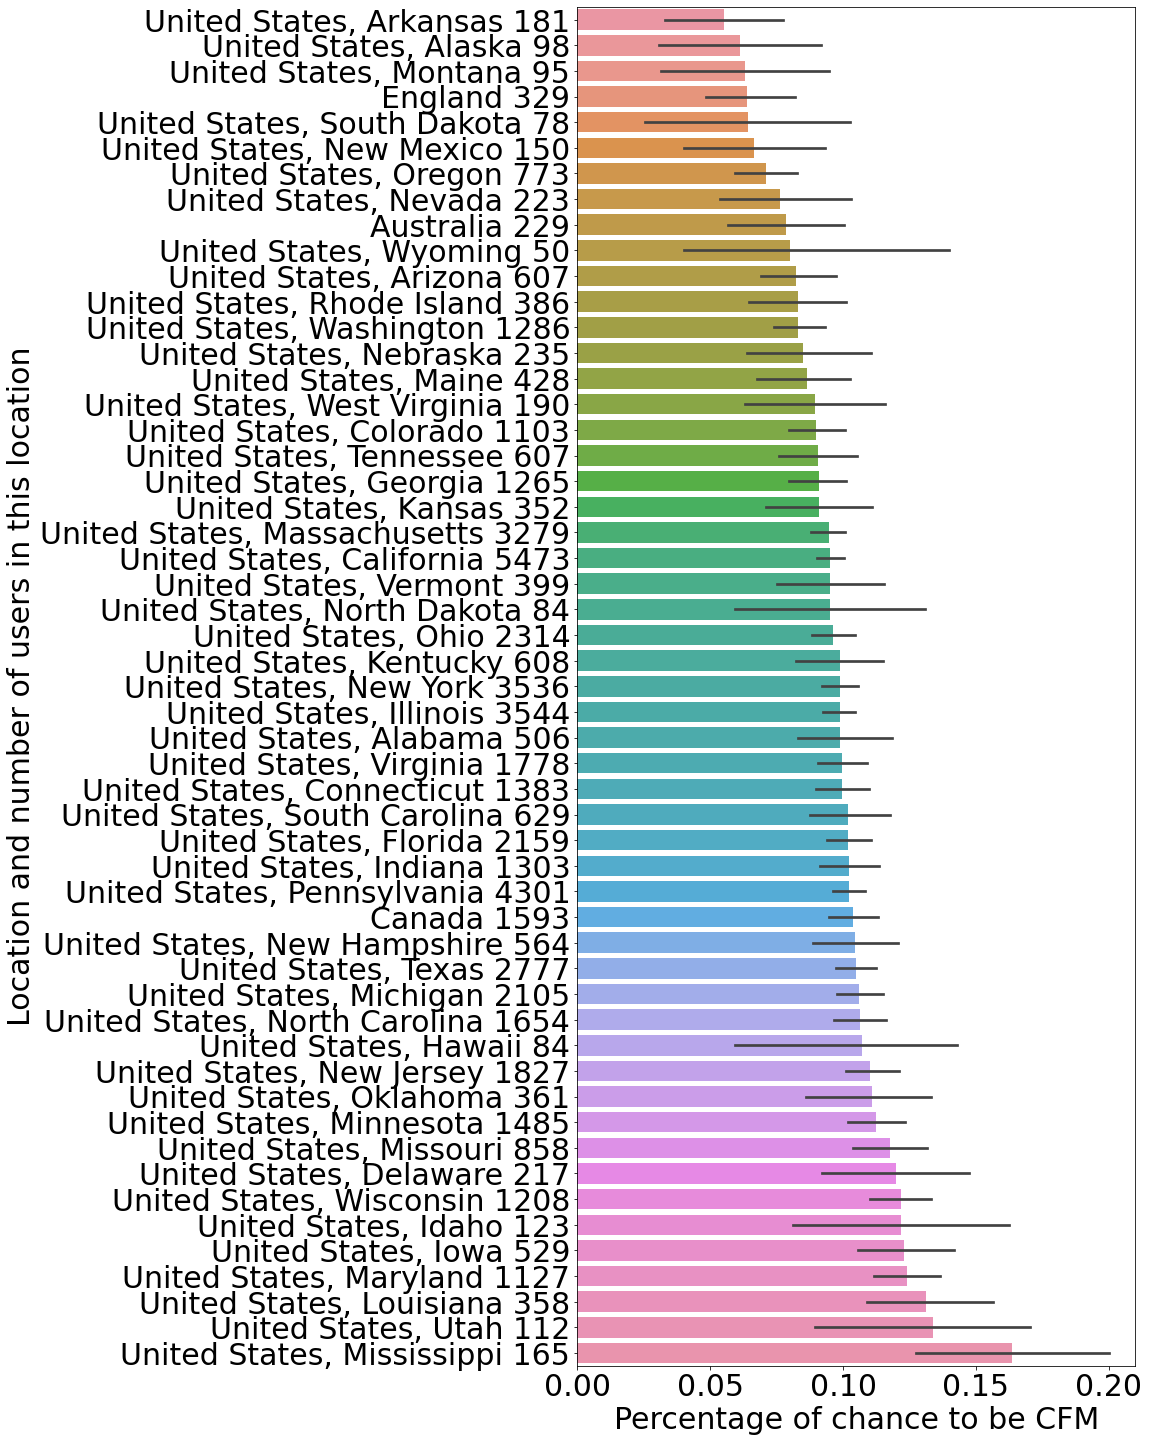

In [13]:
plt.figure(figsize=(10,25))


cfm=users_ddf.groupby('location_users').mean().sort_values('is_cfm').reset_index()
ax=sns.barplot(data=users_ddf, x='is_cfm', y='location_users',order=list(cfm['location_users']),ci=80)
ax.set_ylabel('Location and number of users in this location')
ax.set_xlabel('Percentage of chance to be CFM')

Text(0, 0.5, 'Location and number of users in this location')

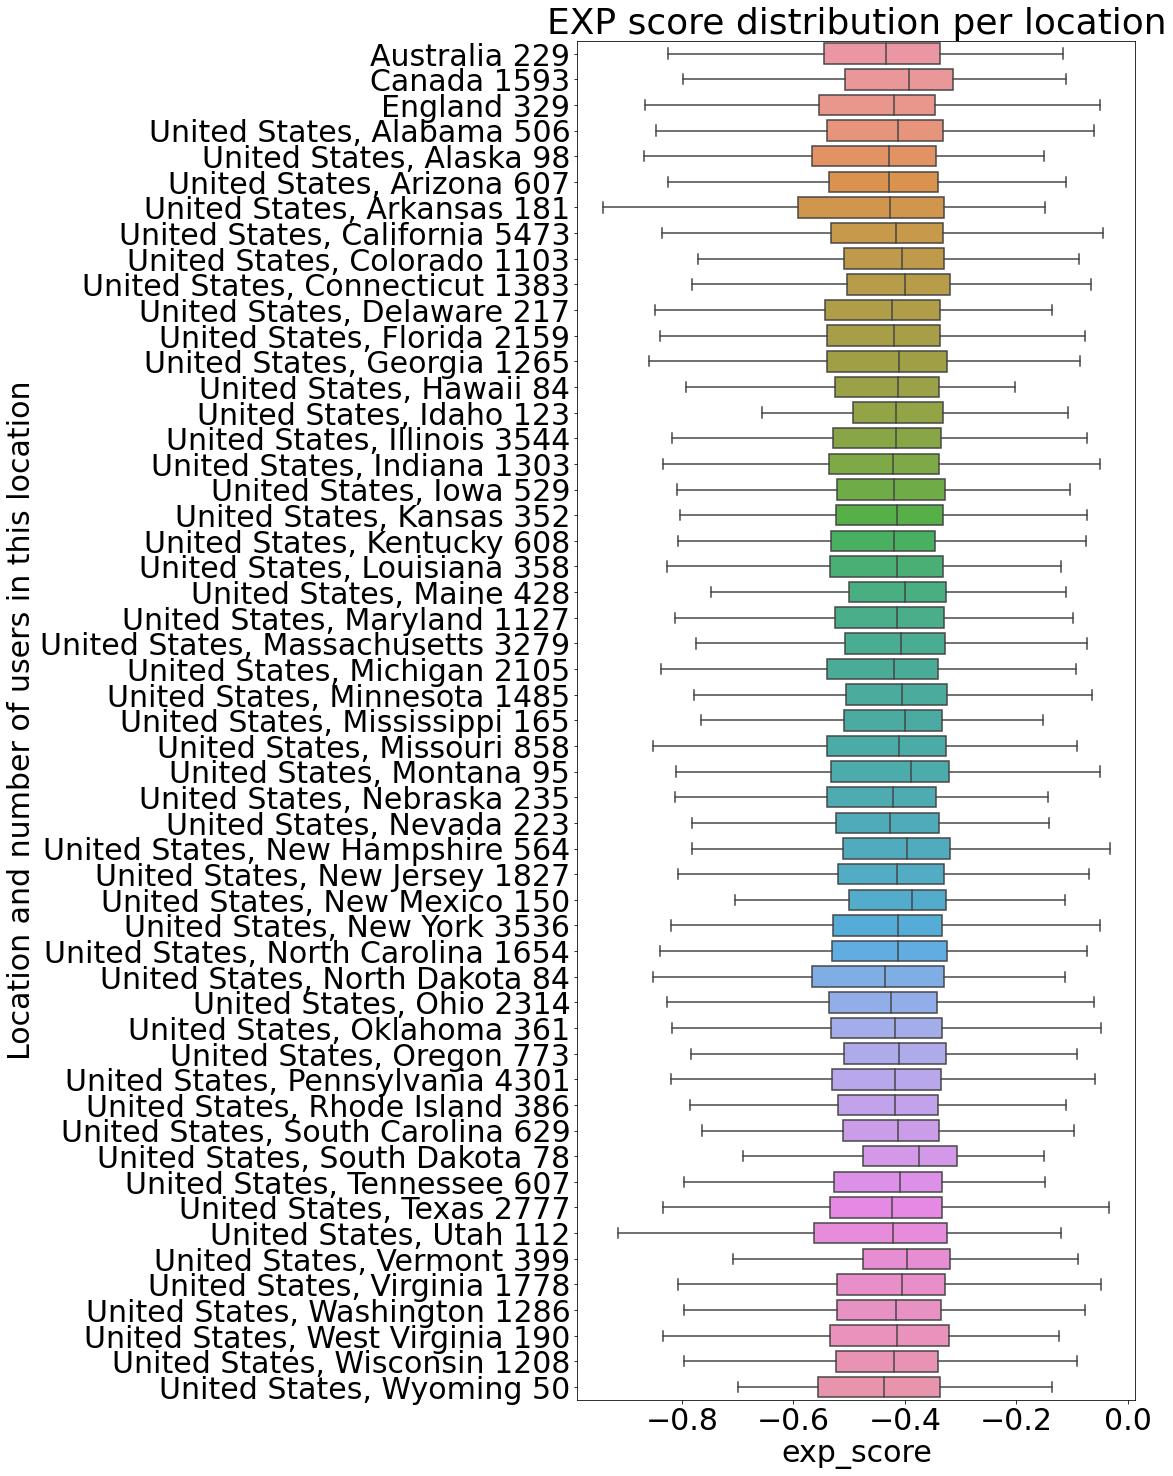

In [14]:
plt.figure(figsize=(10,25))
ax=sns.boxplot(data=users_ddf, x="exp_score", y="location_users",showfliers = False)
ax.set_title('EXP score distribution per location')
ax.set_ylabel('Location and number of users in this location')

Text(0.5, 0, 'Percentage of chance to be EXP')

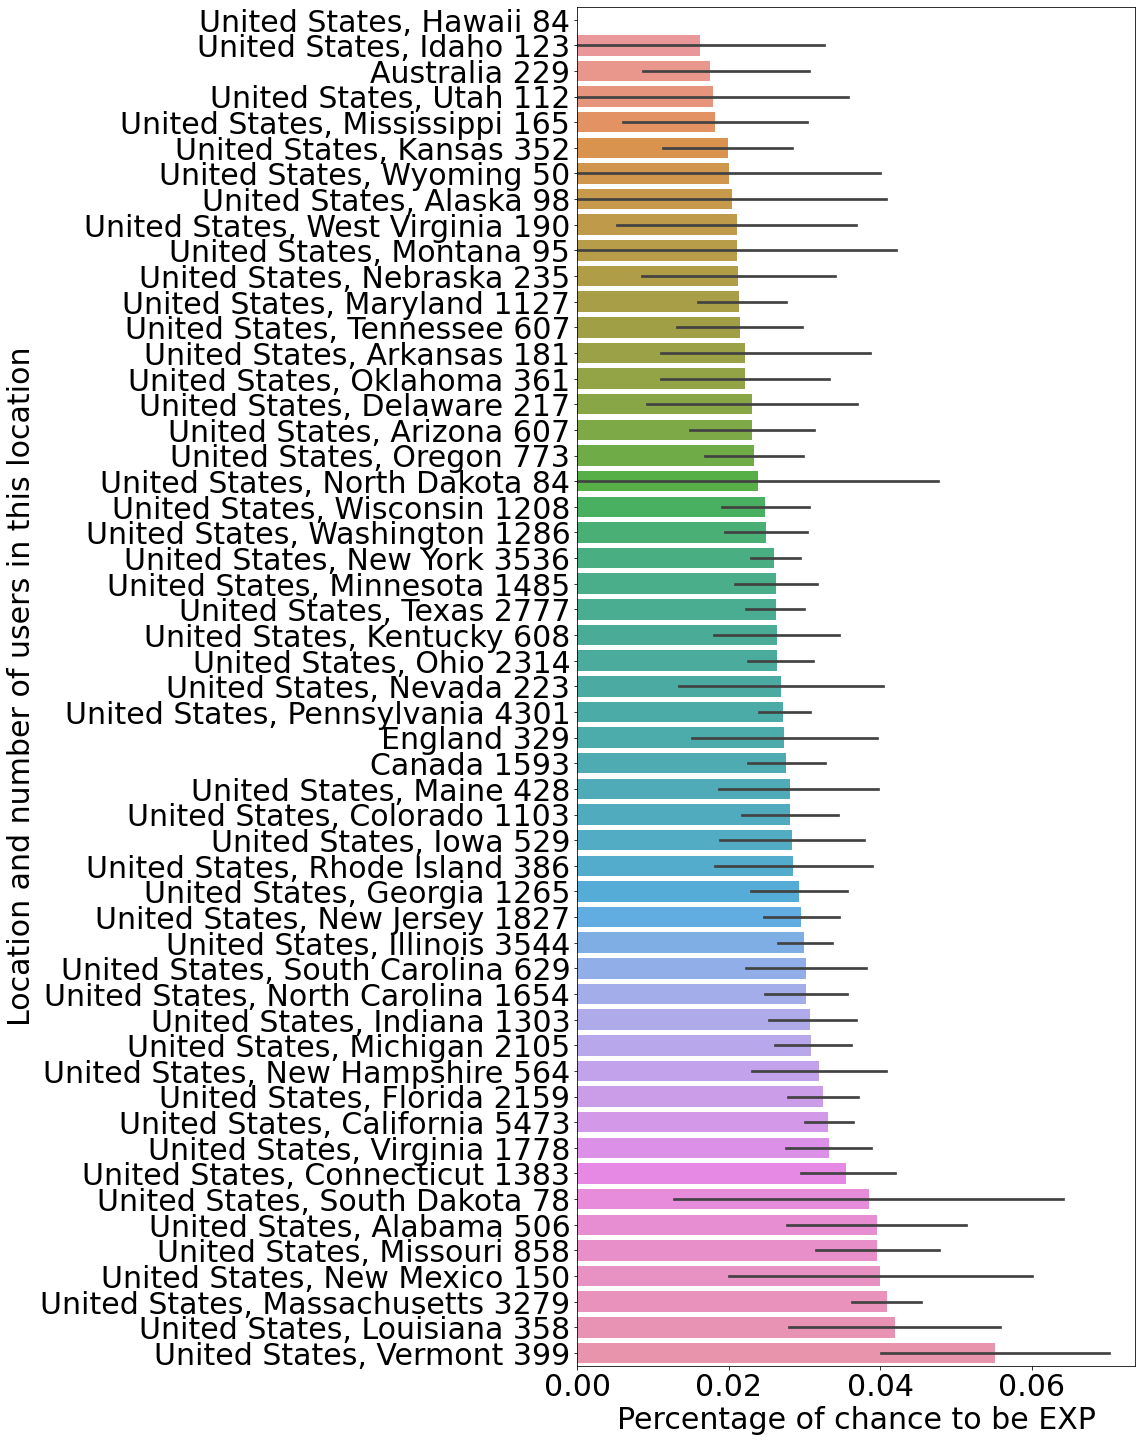

In [15]:
plt.figure(figsize=(10,25))

exp=users_ddf.groupby('location_users').mean().sort_values('is_exp').reset_index()
ax1=sns.barplot(data=users_ddf, x='is_exp', y='location_users',order=list(exp['location_users']),ci=80)
ax1.set_ylabel('Location and number of users in this location')
ax1.set_xlabel('Percentage of chance to be EXP')

<AxesSubplot:title={'center':'XPL score distribution per location'}, xlabel='cfm_score', ylabel='location'>

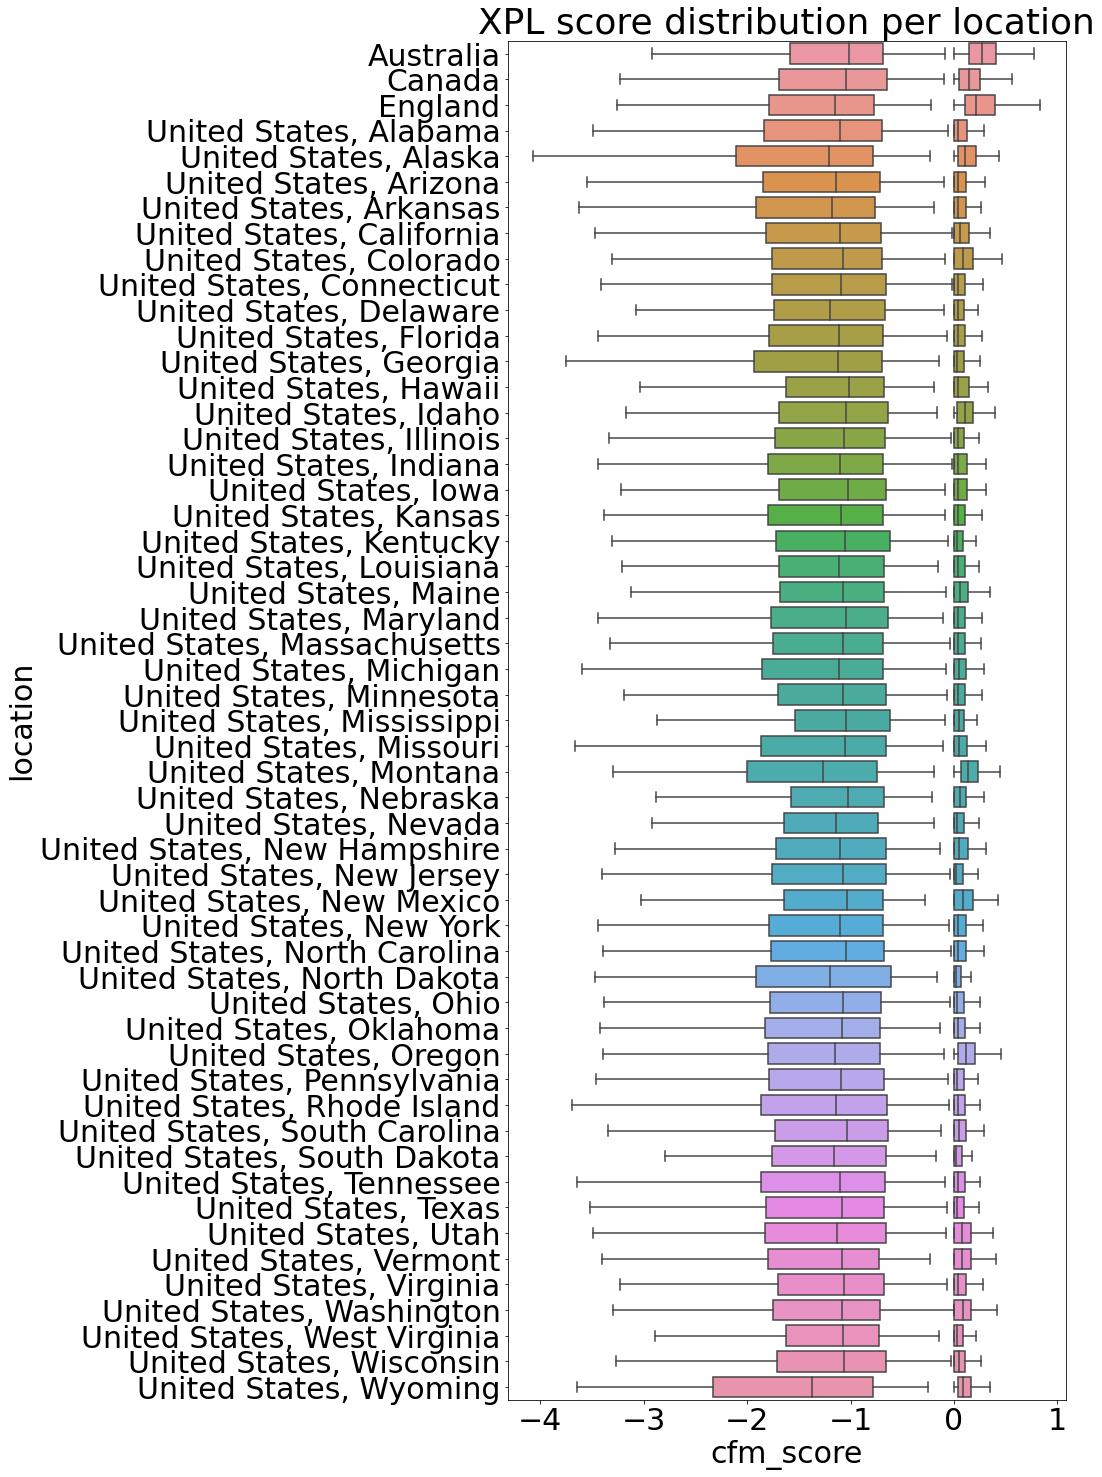

In [16]:
plt.figure(figsize=(10,25))
ax=sns.boxplot(data=users_ddf, x="xpl_score", y="location_users",showfliers = False)
ax.set_title('XPL score distribution per location')
ax.set_ylabel('Location and number of users in this location')
sns.boxplot(data=users_ddf, x="cfm_score", y="location",showfliers = False)

Text(0.5, 0, 'Percentage of chance to be XPL')

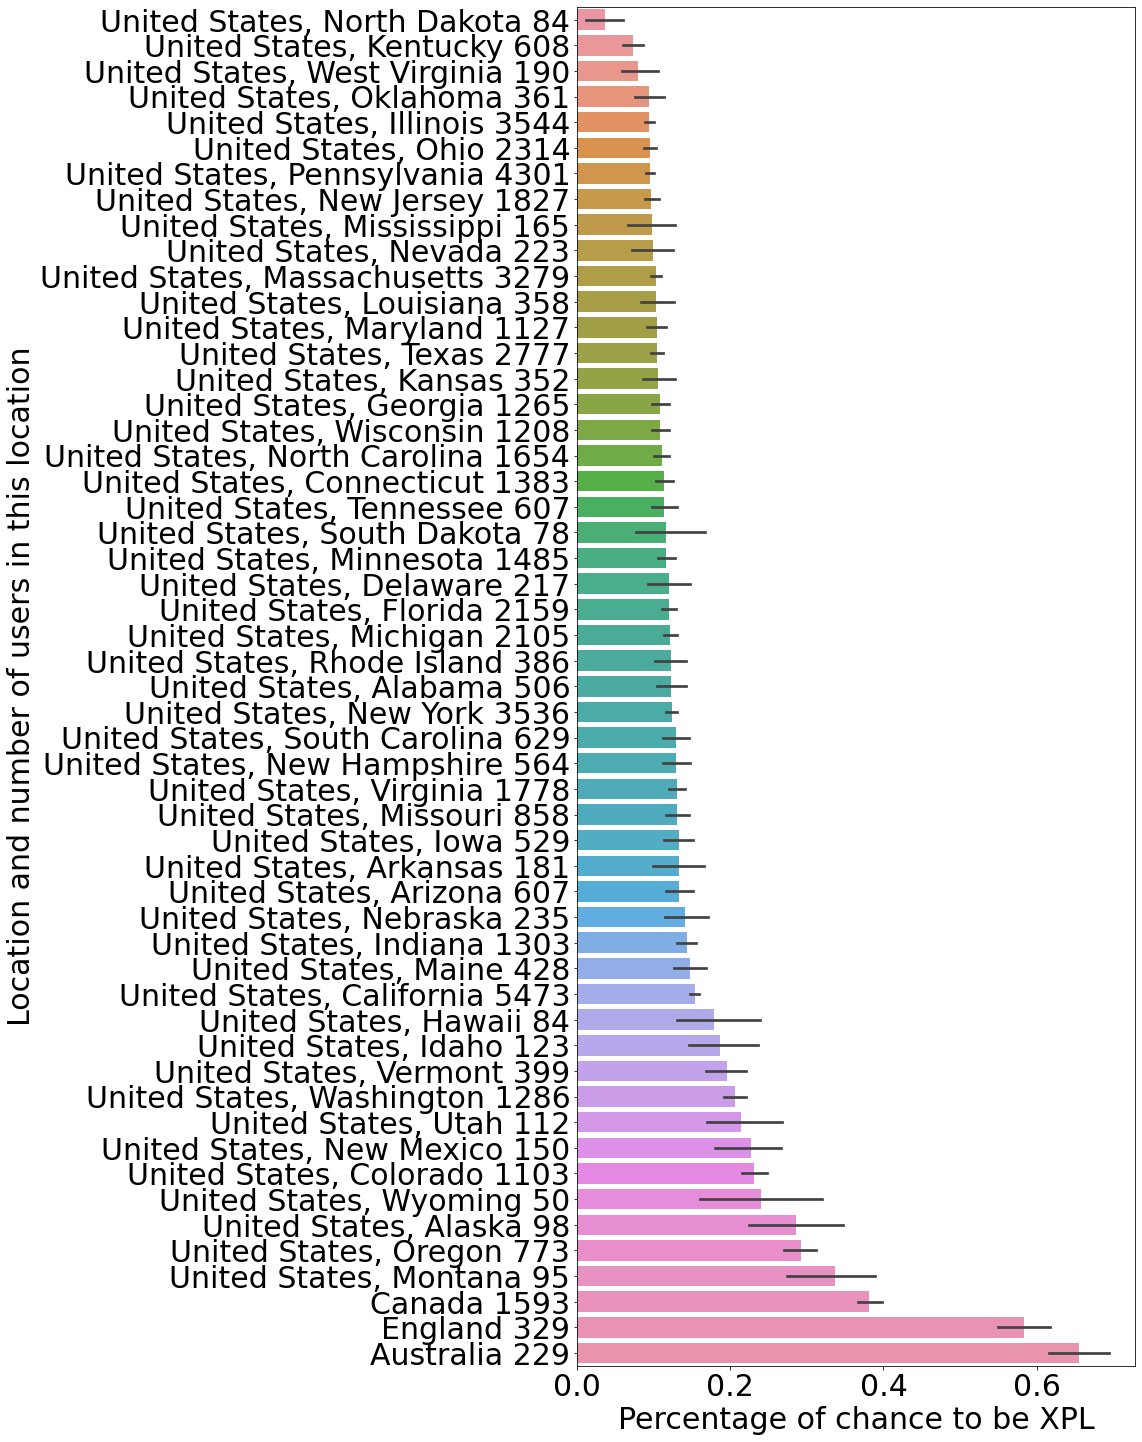

In [17]:
plt.figure(figsize=(10,25))

xpl=users_ddf.groupby('location_users').mean().sort_values('is_xpl').reset_index()
ax2=sns.barplot(data=users_ddf, x='is_xpl', y='location_users',order=list(xpl['location_users']),ci=80)
ax2.set_ylabel('Location and number of users in this location')
ax2.set_xlabel('Percentage of chance to be XPL')

Text(0, 0.5, 'Location and number of users in this location')

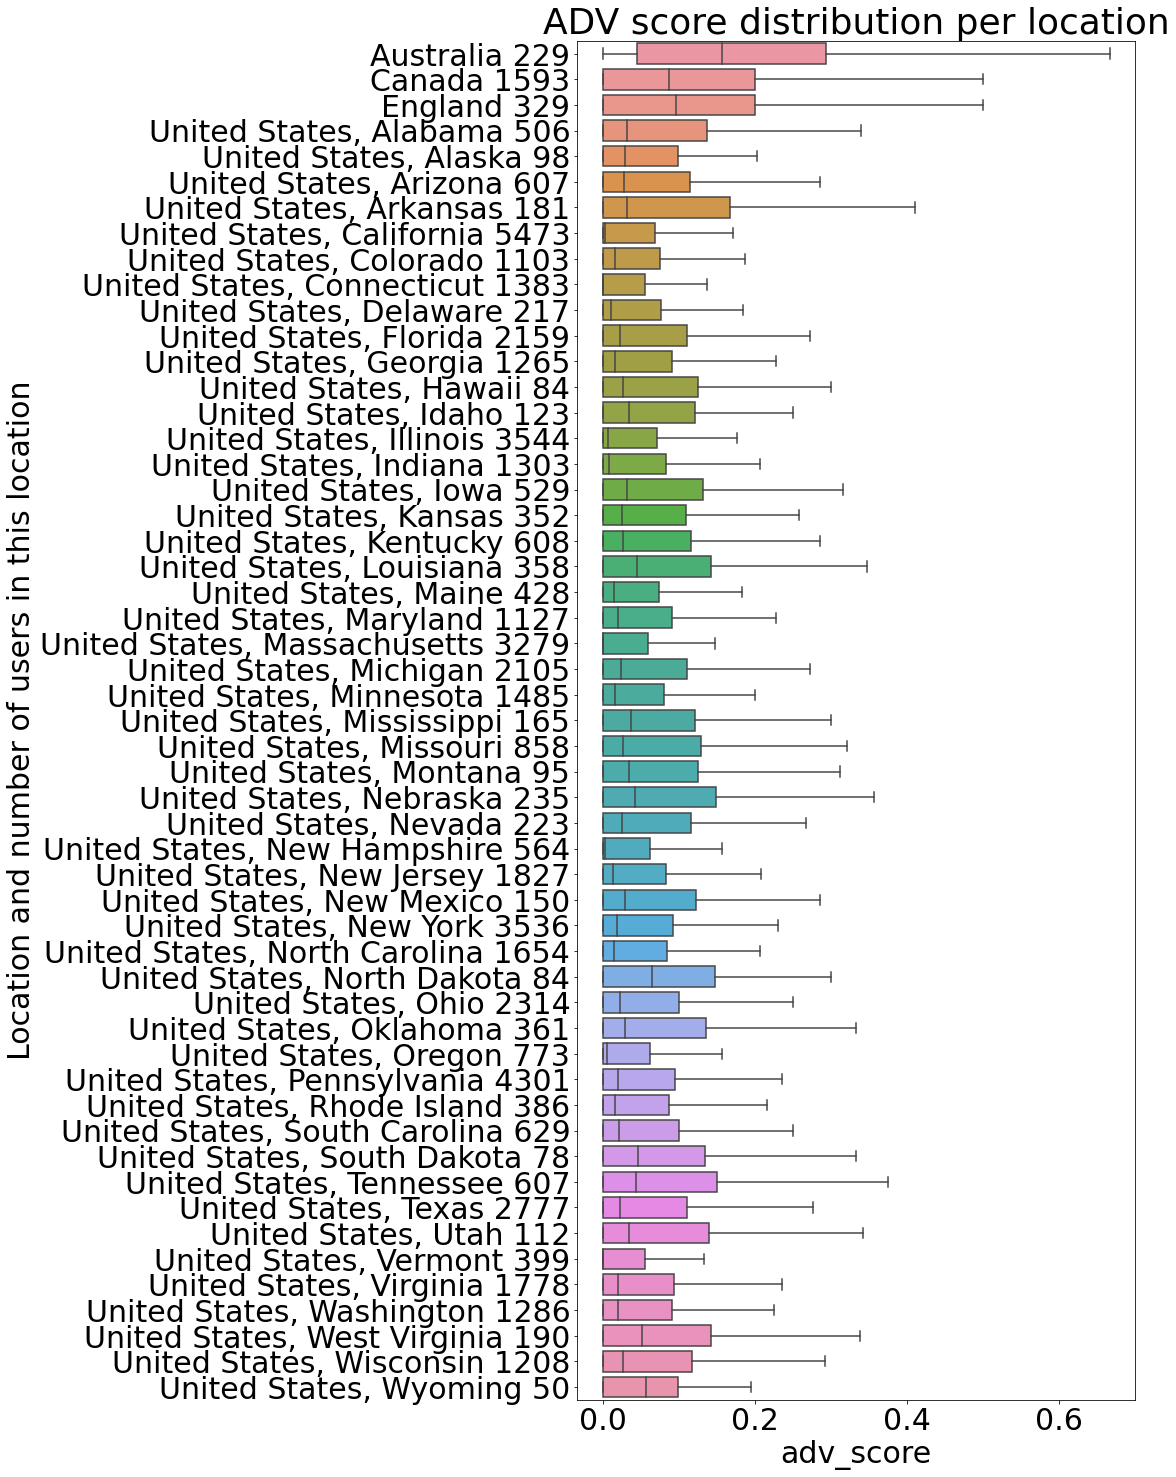

In [18]:
plt.figure(figsize=(10,25))
ax=sns.boxplot(data=users_ddf, x="adv_score", y="location_users",showfliers = False)
ax.set_title('ADV score distribution per location')
ax.set_ylabel('Location and number of users in this location')

Text(0.5, 0, 'Percentage of chance to be ADV')

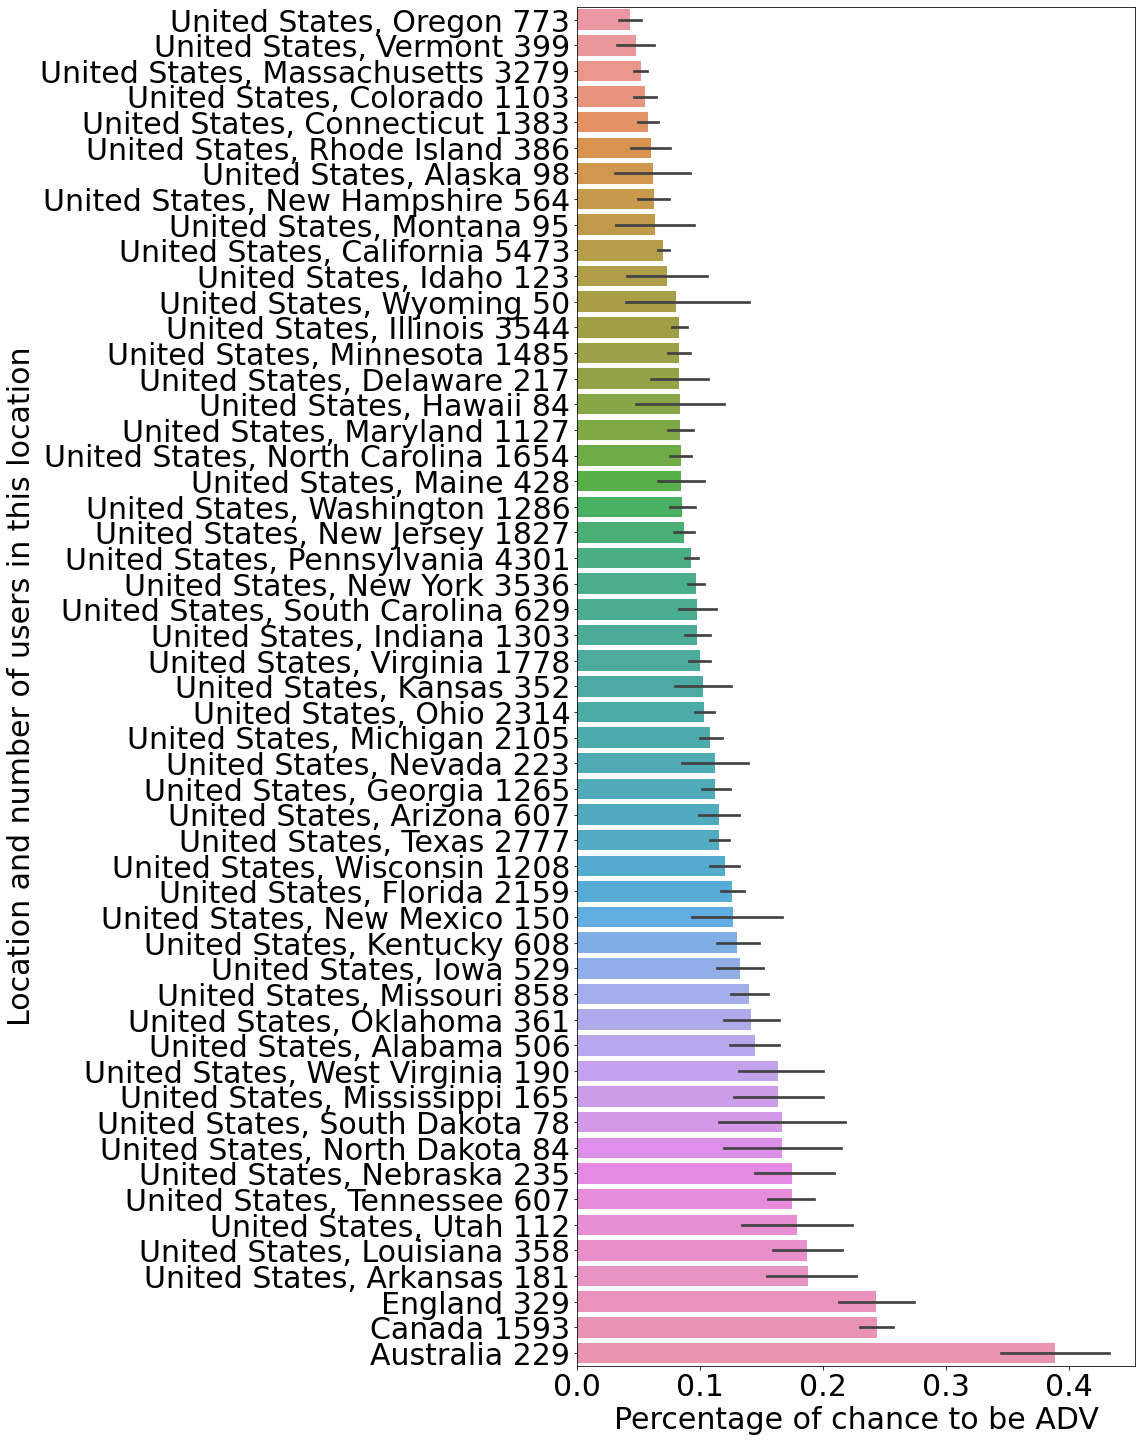

In [19]:
plt.figure(figsize=(10,25))

adv=users_ddf.groupby('location_users').mean().sort_values('is_adv').reset_index()
ax3=sns.barplot(data=users_ddf, x='is_adv', y='location_users',order=list(adv['location_users']),ci=80)
ax3.set_ylabel('Location and number of users in this location')
ax3.set_xlabel('Percentage of chance to be ADV')

In [20]:
location_grouped=users_ddf.groupby('location_users').mean().reset_index()

In [29]:
import plotly.graph_objects as go
fig = go.Figure()
colors = ['#0000FF', '#FF0000', '#FFFF00', '#00FF00', '#800080']
fig.add_trace(go.Bar(
    x=location_grouped[location_grouped['location_users'].isin(list(cfm['location_users'][-10:]))].sort_values('is_cfm',ascending=False)['location_users'],
    y=location_grouped[location_grouped['location_users'].isin(list(cfm['location_users'][-10:]))].sort_values('is_cfm',ascending=False)['is_cfm'],
    name='CFM',
    marker_color='#4477AA'
))
fig.add_trace(go.Bar(
    x=location_grouped[location_grouped['location_users'].isin(list(exp['location_users'][-10:]))].sort_values('is_exp',ascending=False)['location_users'],
    y=location_grouped[location_grouped['location_users'].isin(list(exp['location_users'][-10:]))].sort_values('is_exp',ascending=False)['is_exp'],        
    name='EXP',
    visible=False,
    marker_color='#CCBB44'
))
fig.add_trace(go.Bar(
    x=location_grouped[location_grouped['location_users'].isin(list(xpl['location_users'][-10:]))].sort_values('is_xpl',ascending=False)['location_users'],
    y=location_grouped[location_grouped['location_users'].isin(list(xpl['location_users'][-10:]))].sort_values('is_xpl',ascending=False)['is_xpl'],
    name='XPL',
    visible=False,
    marker_color='#228833'
))
fig.add_trace(go.Bar(
    x=location_grouped[location_grouped['location_users'].isin(list(adv['location_users'][-10:]))].sort_values('is_adv',ascending=False)['location_users'],
    y=location_grouped[location_grouped['location_users'].isin(list(adv['location_users'][-10:]))].sort_values('is_adv',ascending=False)['is_adv'],
    name='ADV',
    visible=False,
    marker_color='#AA3377'
))
# create a dropdown menu to choose which category to show (default is overall)
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="CFM",
                        method="update",
                        args=[{"visible": [True, False, False, False]},
                    ])
                    ,
                dict(label="EXP",
                        method="update",
                        args=[{"visible": [False, True, False, False]}
                           ]),
                dict(label="XPL",
                        method="update",
                        args=[{"visible": [False, False, True, False]}
                           ]),
                dict(label="ADV",
                        method="update",
                        args=[{"visible": [False, False, False, True]}
                            ]),
            ]), 
        )
    ])

fig.show()


